In [1]:
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from tensorflow import keras

In [2]:
CHECKPOINT_PATH = "/Users/nitu/Downloads/Checkpoint_count.csv"
WEATHER_PATH = "/Users/nitu/Downloads/weather.csv"

In [3]:
checkpoint = pd.read_csv(CHECKPOINT_PATH)
weather = pd.read_csv(WEATHER_PATH)

In [4]:
weather.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
2,1/1/15,2015,1,1,‡,-3,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
3,1/2/15,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0,T,0,T,1,NaN,27,NaN,50,NaN
4,1/3/15,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN


In [5]:
checkpoint.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,1/1/15,0:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2/1/15,0:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,3/1/15,0:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,4/1/15,0:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,5/1/15,0:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [6]:
weather.columns = weather.iloc[1]

for a in range(0,2):
    weather = weather.drop(weather.index[0])


weather = weather.reset_index(drop=True)
weather

1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1/1/15,2015,1,1,‡,-3,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
1,1/2/15,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0,T,0,T,1,NaN,27,NaN,50,NaN
2,1/3/15,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN
3,1/4/15,2015,1,4,‡,3,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8,NaN,26,NaN,69,NaN
4,1/5/15,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0,T,0,T,6,NaN,27,NaN,74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/15,2015,12,27,‡,1.9,NaN,-4.1,NaN,-1.1,...,2.6,NaN,13.4,NaN,1,NaN,3,NaN,44,NaN
361,12/28/15,2015,12,28,‡,-4.1,NaN,-10.9,NaN,-7.5,...,0,T,0,T,2,NaN,30,NaN,44,NaN
362,12/29/15,2015,12,29,‡,-7.5,NaN,-12.1,NaN,-9.8,...,39.2,NaN,39.2,NaN,7,NaN,NaN,NaN,<31,NaN
363,12/30/15,2015,12,30,‡,-5.1,NaN,-9.2,NaN,-7.2,...,5.6,NaN,3.4,NaN,16,NaN,NaN,NaN,<31,NaN


Let's look at the data in checkpoint

In [7]:
checkpoint.describe()

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,209.000000,319.000000,319.000000,319.000000,319.000000,50.000000,319.000000,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2164.578947,2207.626959,2939.294671,1477.206897,207.476489,4563.180000,1387.119122,1903.363636,2023.708464,295.347962
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,1049.224968,1660.936427,2105.774880,1254.990855,231.009131,1667.554469,1070.781272,1376.375755,1632.368428,248.947624
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1554.000000,0.000000,20.000000,6.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,1221.000000,324.500000,513.000000,159.500000,15.500000,3097.250000,244.500000,457.000000,352.500000,47.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,2349.000000,2361.000000,3169.000000,1422.000000,107.000000,4825.500000,1519.000000,1855.000000,1762.000000,267.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,2966.000000,3658.000000,4797.000000,2676.000000,337.000000,5957.750000,2237.000000,3111.000000,3539.000000,526.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,6014.000000,7921.000000,7695.000000,4118.000000,781.000000,7388.000000,4342.000000,5166.000000,5596.000000,820.000000


<Axes: xlabel='Date'>

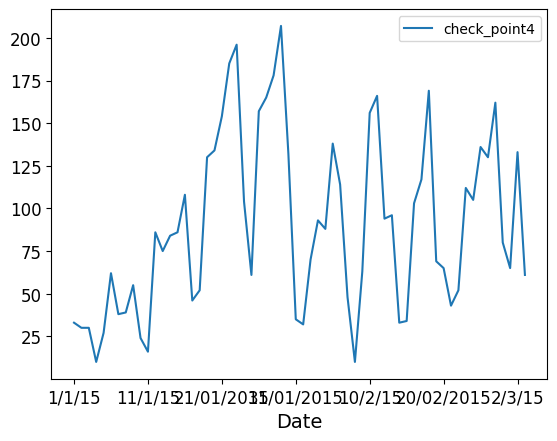

In [8]:
checkpoint.plot(x= "Date", y= "check_point4")

<Axes: xlabel='Date'>

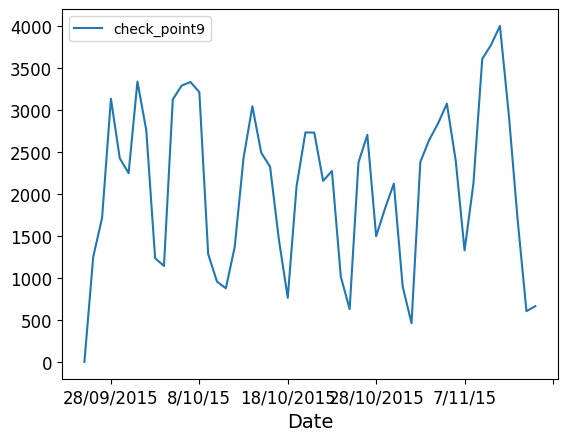

In [9]:
checkpoint.plot(x= "Date", y= "check_point9")

<Axes: xlabel='Date'>

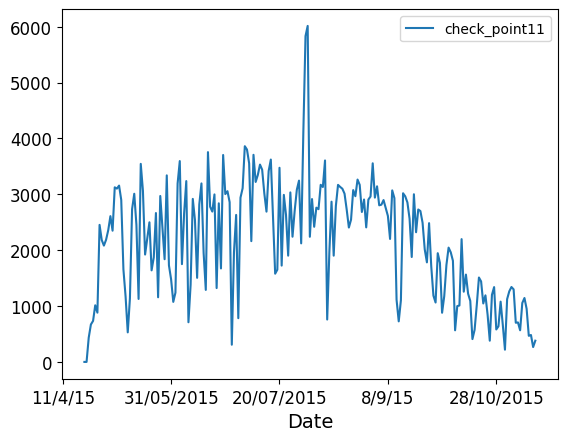

In [10]:
checkpoint.plot(x= "Date", y= "check_point11")

<Axes: xlabel='Date'>

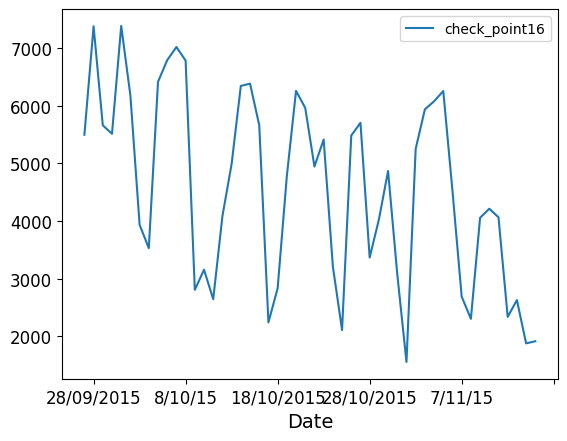

In [11]:
checkpoint.plot(x= "Date", y= "check_point16")

In [12]:
weather.describe()

1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
count,365,365,365,365,365,365,0,365,1,365,...,361,33,355,63,109,0,283,1,364,1
unique,365,1,12,31,1,241,0,250,1,233,...,31,2,69,2,21,0,34,1,29,1
top,1/1/15,2015,1,1,‡,28.7,NaN,16,E,19.3,...,0,T,0,T,0,NaN,23,M,<31,M
freq,1,365,31,12,365,6,NaN,5,1,8,...,303,29,195,53,17,NaN,33,1,81,1


In [13]:
groups= [2,3,4,5,7,8,9,10,12,14,15,16,17,19,20,21,22]
groups

[2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19, 20, 21, 22]

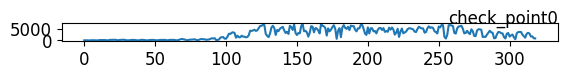

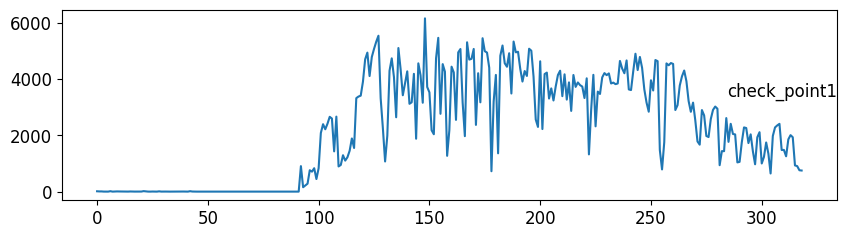

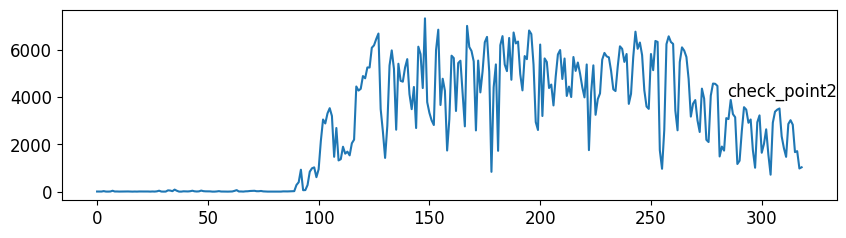

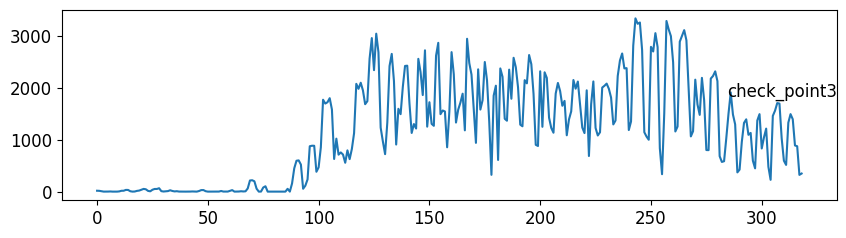

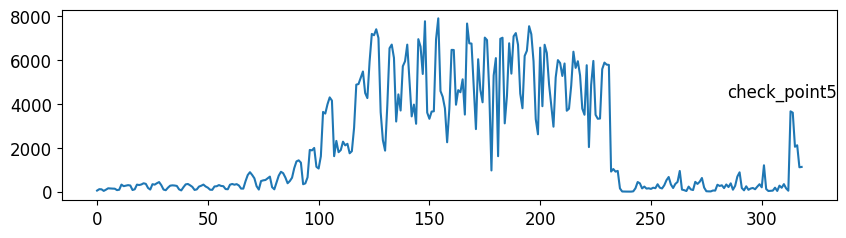

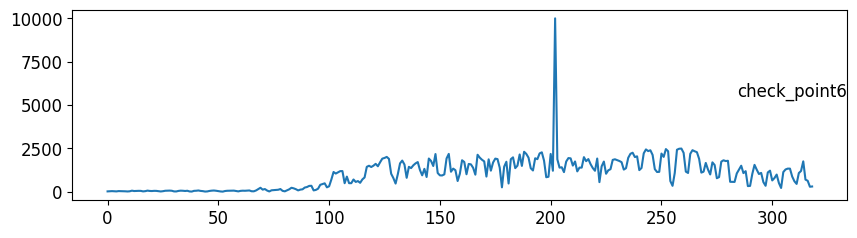

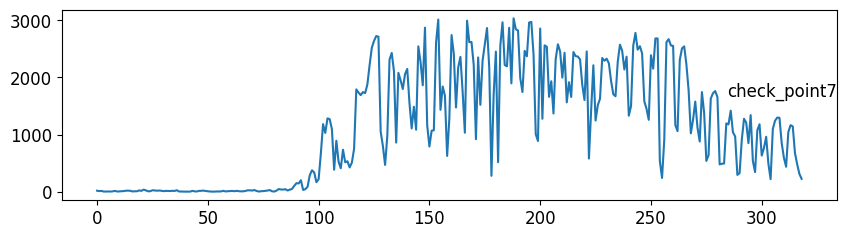

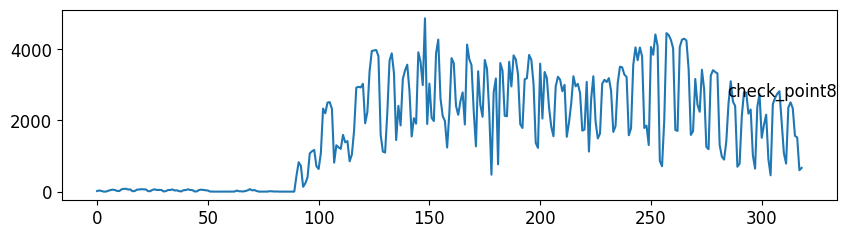

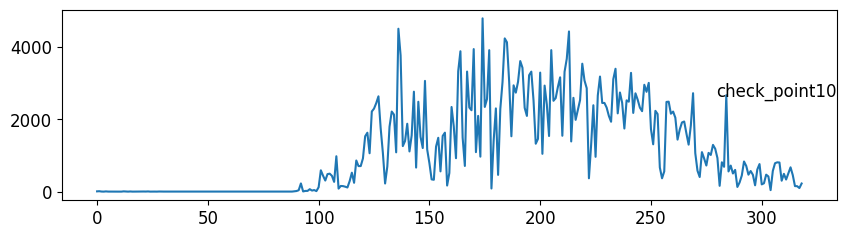

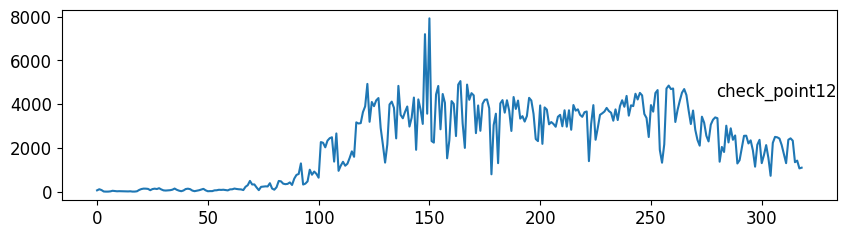

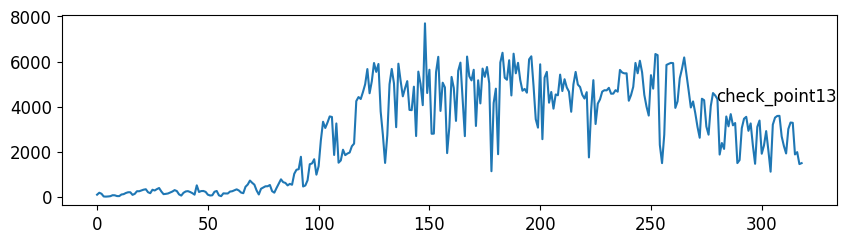

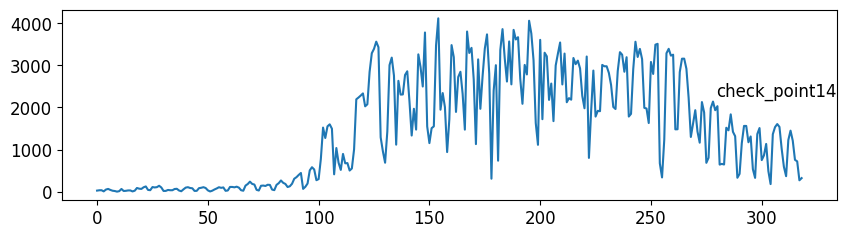

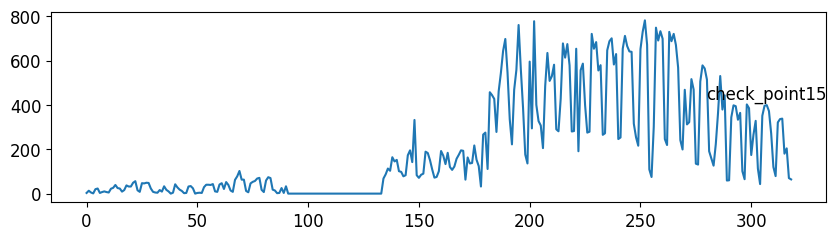

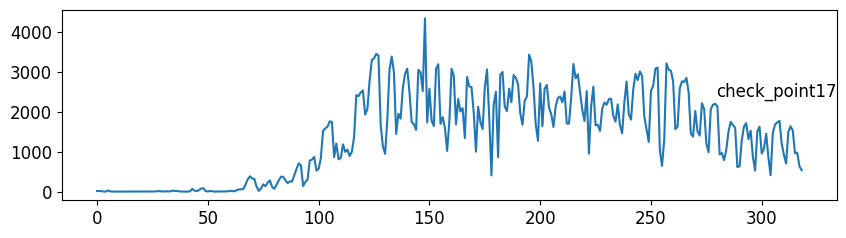

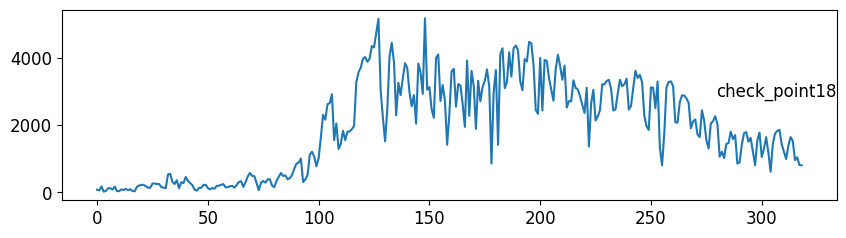

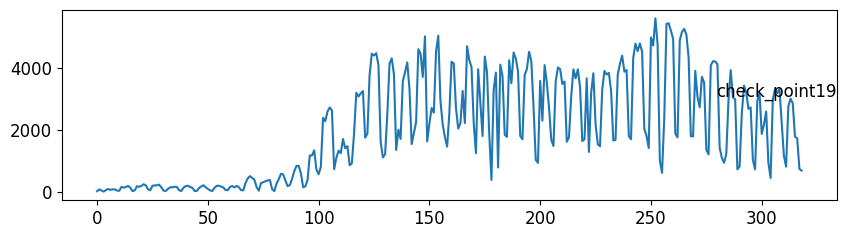

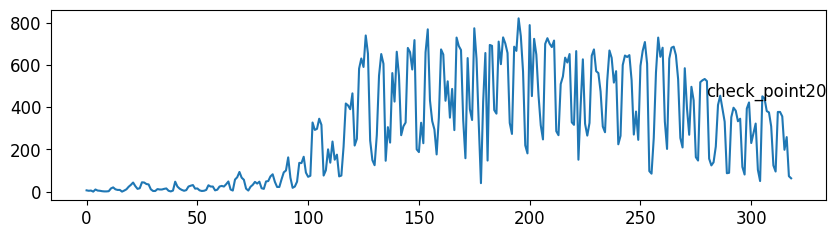

<Figure size 1000x5000 with 0 Axes>

In [14]:
i = 1
values = checkpoint.values
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(checkpoint.columns[group], y=0.5, loc='right')
    plt.figure(figsize=(10,50))
    i += 1
plt.show()

In [15]:
Dataset = weather.drop(weather.tail(46).index,
        inplace = True)
Dataset

In [16]:
features = ['Month','Day','Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)','Total Snow (cm)','Total Precip (mm)','Spd of Max Gust (km/h)']

In [17]:
extracted_cols = weather[features]
extracted_cols=extracted_cols.fillna(method='ffill')

In [18]:
extracted_cols.describe()

1,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Snow (cm),Total Precip (mm),Spd of Max Gust (km/h)
count,319,319,319,319,319,319,319,319
unique,11,31,216,225,214,29,62,28
top,1,1,28.7,16,19.3,0,0,<31
freq,31,11,6,5,8,267,176,69


In [19]:
Dataset = checkpoint.join(extracted_cols)


In [20]:
Dataset

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point19,check_point20,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Snow (cm),Total Precip (mm),Spd of Max Gust (km/h)
0,1/1/15,0:00,58,12,4,17,33.0,49,21,16,...,21,6,1,1,-3,-7.6,-5.3,1.8,1.8,63
1,2/1/15,0:00,75,7,5,15,30.0,113,27,9,...,77,4,1,2,-3.4,-14.2,-8.8,0,0,50
2,3/1/15,0:00,79,7,3,7,30.0,107,36,12,...,40,5,1,3,-8.5,-17.7,-13.1,17,17,41
3,4/1/15,0:00,10,1,21,0,10.0,35,29,1,...,6,0,1,4,3,-8.6,-2.8,0.4,27.2,69
4,5/1/15,0:00,42,0,2,0,27.0,90,21,1,...,56,10,1,5,-5.3,-17.9,-11.6,0,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,11/11/15,0:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,2860,356,11,11,10.8,4,7.4,0,0.2,<31
315,12/11/15,0:00,1751,930,1670,888,NaN,2048,700,675,...,1777,198,11,12,11.9,6.3,9.1,0,15.6,63
316,13/11/2015,0:00,1818,906,1711,873,NaN,2115,634,477,...,1727,258,11,13,9.4,0.9,5.2,0,15.6,48
317,14/11/2015,0:00,979,759,978,322,NaN,1112,290,310,...,737,73,11,14,4.1,-0.2,2,0,0,50


In [21]:
Dataset=Dataset.drop(columns=['Time'])

In [22]:
Dataset=Dataset.set_index('Date')

In [23]:
cols = ['check_point1', 'check_point1','check_point2','check_point3','check_point4','check_point5','check_point6','check_point7','check_point8','check_point9','check_point10','check_point11','check_point12','check_point13','check_point14','check_point15','check_point16','check_point17','check_point18','check_point19','check_point20','check_point0']
Dataset['Target'] = Dataset[cols].sum(axis=1)

In [24]:
Dataset

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,check_point20,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Snow (cm),Total Precip (mm),Spd of Max Gust (km/h),Target
Date,,,,,,,,,,,,,,,,,,,,,
1/1/15,58,12,4,17,33.0,49,21,16,16,NaN,...,6,1,1,-3,-7.6,-5.3,1.8,1.8,63,543.0
2/1/15,75,7,5,15,30.0,113,27,9,32,NaN,...,4,1,2,-3.4,-14.2,-8.8,0,0,50,811.0
3/1/15,79,7,3,7,30.0,107,36,12,18,NaN,...,5,1,3,-8.5,-17.7,-13.1,17,17,41,781.0
4/1/15,10,1,21,0,10.0,35,29,1,0,NaN,...,0,1,4,3,-8.6,-2.8,0.4,27.2,69,159.0
5/1/15,42,0,2,0,27.0,90,21,1,1,NaN,...,10,1,5,-5.3,-17.9,-11.6,0,0,74,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/11/15,3044,1931,2828,1393,NaN,3603,1754,1142,2342,3997.0,...,356,11,11,10.8,4,7.4,0,0.2,<31,42871.0
12/11/15,1751,930,1670,888,NaN,2048,700,675,1566,2945.0,...,198,11,12,11.9,6.3,9.1,0,15.6,63,25105.0
13/11/2015,1818,906,1711,873,NaN,2115,634,477,1522,1693.0,...,258,11,13,9.4,0.9,5.2,0,15.6,48,24237.0


# Handling missing values
The checkpoint dataset had a peculiar missing values which could not be filled by interpolation techniques. For checkpoint 4, 9, 11 and 16 data was present for a specific interval of 50-60 days. A fair assumption that the checkpoints were open on those days only can be made and the missing data could be replaced by 0.
From weather dataset extracted relevant columns with least missing values and used forward fill to handle missing values as there cannot be drastic weather changes on consecutive days

In [25]:
Dataset.fillna(0,inplace=True)

In [26]:
Dataset.replace('<31',31,inplace=True)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Dataset)

# Split the data into features and target
X = scaled_data[:, :-1]  # Use all columns except the last as features
y = scaled_data[:, -1]   # Use the last column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [28]:
# Define the LSTM model
model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the input data to fit the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data = (X_test,y_test))


Epoch 1/50
4/4 [==============================] - 1s 53ms/step - loss: 0.2308 - val_loss: 0.1853
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1797 - val_loss: 0.1305
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1330 - val_loss: 0.0706
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0766 - val_loss: 0.0158
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0417 - val_loss: 0.0476
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0380 - val_loss: 0.0126
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0305 - val_loss: 0.0129
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0276 - val_loss: 0.0088
Epoch 9/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0159 - val_loss: 0.0197
Epoch 10/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0118 - val_loss: 0.0054
Epoch 11/50
4/4 [============

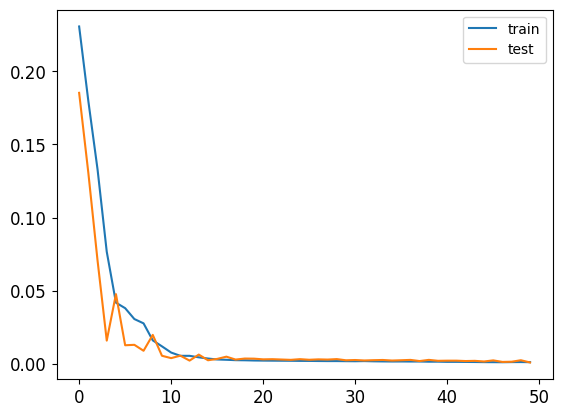

In [29]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [30]:
# Make predictions
y_pred = model2.predict(X_test)
# Inverse transform the predictions and actual values to the original scale
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
y_pred = scaler.inverse_transform(np.hstack((X_test, y_pred)))
y_test = scaler.inverse_transform(np.hstack((X_test, y_test.reshape(-1, 1))))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test[:, -1], y_pred[:, -1]))
print(f'RMSE: {rmse}')

2/2 [==============================] - 0s 5ms/step
RMSE: 2492.9650851477327


In [31]:
X_test.shape

(64, 29)

In [32]:
y_pred[-1][-1]

15339.404780387878

In [33]:
mape= keras.metrics.mean_absolute_percentage_error(
    y_pred[-1], y_test[-1])
mape

<tf.Tensor: shape=(), dtype=float64, numpy=0.2156547781342669>